In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [17]:
import pandas as pd
df = pd.DataFrame(digits.data)
df["Digits"] = digits.target
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Digits
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


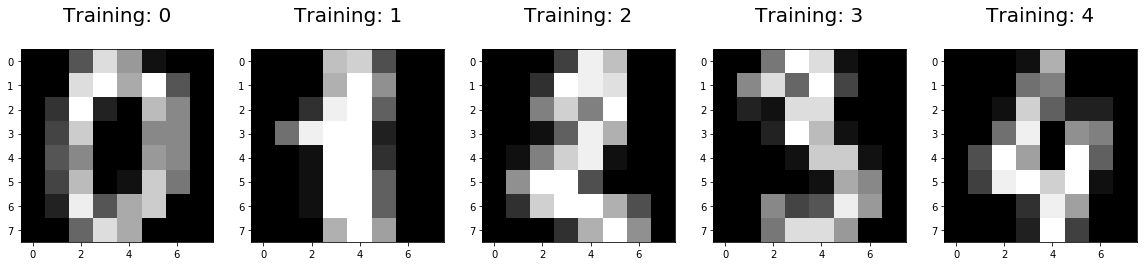

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

X = digits.data[:,:]
y = digits.target
r = 64
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.2, random_state=r)

Data has been split into test and train sets. Model will be built on training set and tested on the the test set to judge accuracy of said model.

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=r)
forest.fit(X_train, y_train)
print("Accuracy of random forest is: ", forest.score(X_test, y_test))

Accuracy of random forest is:  0.9666666666666667


Will investigate the optimal depth for the model as a depth that is too high can impair the accuracy. Estimator value of 100 should provide high accuracy here.

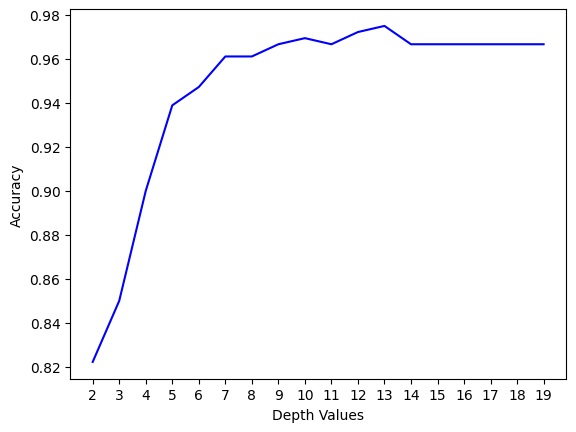

In [12]:
depths = range(2, 20)

test_scores = []

for i in depths:
    forest = RandomForestClassifier(max_depth = i, n_estimators=100, random_state=r)
    forest.fit(X_train, y_train)
    score_test = forest.score(X_test, y_test)
    test_scores.append(score_test)

fig, ax = plt.subplots()
ax.plot(depths, test_scores, color = "blue")
plt.xlabel("Depth Values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(depths)
plt.show()

A max depth of 13 is optimal for this model.

In [13]:
forest = RandomForestClassifier(max_depth = 13, n_estimators=100, random_state=r)
forest.fit(X_train, y_train)
print("Accuracy of final model is: ", forest.score(X_test, y_test))

Accuracy of final model is:  0.975


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = forest.predict(X_test)
classes = [i for i in range(10)]
cm = confusion_matrix(y_pred, y_test)
cm_df = pd.DataFrame(cm, columns = classes, index = classes)
cm_df

,0,1,2,3,4,5,6,7,8,9
0,32,0,0,0,0,0,0,0,0,0
1,0,28,0,0,0,0,0,0,1,0
2,0,0,33,0,0,0,0,0,1,0
3,0,0,0,37,0,0,0,0,0,0
4,1,0,0,0,38,0,0,0,0,0
5,0,0,0,0,0,33,0,0,0,0
6,0,0,0,0,0,1,35,0,0,0
7,0,0,0,0,0,0,0,45,0,1
8,0,0,0,2,0,0,0,0,36,0
9,0,0,0,0,0,1,0,0,1,34


The model struggled the most with the class 8 as it made three incorrect predictions, there were no more than two incorrect predictions in any other class.

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Accuracy of final model is: ", accuracy_score(y_test, y_pred))
print("The Precision of the model is:", precision_score(y_test, y_pred, average = "macro"))
print("The Recall of the model is:", recall_score(y_test, y_pred, average = "macro"))
print("The F1 Score of the model is:", f1_score(y_test, y_pred, average = "macro"))

Accuracy of final model is:  0.975
The Precision of the model is: 0.9752760408316918
The Recall of the model is: 0.9755777555777556
The F1 Score of the model is: 0.9751169480572264
